In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

In [42]:
#data = pd.read_table('abalone.data',sep=',', names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight','rings'], engine='python')
data = pd.read_csv('/Users/danilalbutov/Data/Учеба/7 семак/mlLab/mlLab4/abalone.data')
# Модель из документации изначально масштабирована от 0 до 15, поэтому не будем ее масштабировать

x_columns = data[['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]#.head()
y_columns = data[['rings']]

X_train = x_columns.iloc[:2000]
y_train = y_columns.iloc[:2000]

X_test = x_columns.iloc[2000:]
y_test = y_columns.iloc[2000:]
data.count

<bound method DataFrame.count of      sex  length  diameter  height  whole_weight  shucked_weight  \
0      M    0.46      0.36    0.10          0.51            0.22   
1      M    0.35      0.27    0.09          0.23            0.10   
2      F    0.53      0.42    0.14          0.68            0.26   
3      M    0.44      0.36    0.12          0.52            0.22   
4      I    0.33      0.26    0.08          0.20            0.09   
...   ..     ...       ...     ...           ...             ...   
4172   F    0.56      0.45    0.17          0.89            0.37   
4173   M    0.59      0.44    0.14          0.97            0.44   
4174   M    0.60      0.47    0.20          1.18            0.53   
4175   F    0.62      0.48    0.15          1.09            0.53   
4176   M    0.71      0.56    0.20          1.95            0.95   

      viscera_weight  shell_weight  rings  
0               0.10          0.15     15  
1               0.05          0.07      7  
2               0.

[[0.46   0.38   0.13   0.639  0.3    0.1525]
 [0.59   0.45   0.16   0.9    0.358  0.156 ]
 [0.4    0.335  0.115  0.4335 0.2105 0.1205]
 ...
 [0.64   0.52   0.175  1.248  0.4245 0.2595]
 [0.505  0.4    0.125  0.77   0.2735 0.159 ]
 [0.525  0.41   0.165  0.8005 0.2635 0.1985]]
265     0.46
642     0.59
3267    0.40
2843    0.60
521     0.36
        ... 
2316    0.54
1594    0.53
496     0.64
728     0.51
3946    0.53
Name: length, Length: 2088, dtype: float64


In [52]:
alphas = [0.00001, 0.0001, 0.001, 0.01]
#np.arange(0, 1, 0.01)

score_list = []

penalty=['l2']
# l1, l2, elasticnet
for pen in penalty:
    for alpha in alphas:
        perc = Perceptron(penalty=f'{pen}', alpha=alpha)
        perc.fit(X_train, y_train.values.ravel())
        perc.predict(X_test)
        score_list.append(perc.score(X_test, y_test))

print("Best score={r2} with alpha={alpha}".format(r2=max(score_list), alpha=alphas[score_list.index(max(score_list))]))

plt.axis([0, 0.011, 0, 1])
plt.plot(alphas, score_list)
plt.plot(alphas, score_list, 'bo')
plt.xlabel("alpha")
plt.ylabel("r2")
plt.savefig('int4/perceptron_l2.png')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [2088, 2000]

In [11]:
#3
degrees = [1, 4, 8, 16]
train_scores = []
test_scores = []

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_train, y_train)
    
    train_scores.append(pipeline.score(x_train, y_train))
    test_scores.append(pipeline.score(x_test, y_test))
    
train_scores, test_scores

([0.8386436898487696,
  0.9474922557878316,
  0.952411832567467,
  0.953881177511537],
 [0.8403009307392092,
  0.9435457229743707,
  -0.4544876055116296,
  -85996188.09536678])

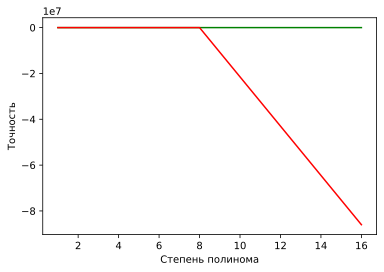

In [12]:
plt.plot(degrees, train_scores, color='green', label="Обучающая выборка")
plt.plot(degrees, test_scores, color='red', label="Тестовая выборка")
plt.xlabel("Степень полинома")
plt.ylabel("Точность")
plt.show()

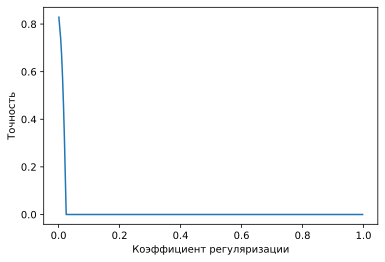

In [17]:
alpha = 0.001
step = 0.003

r2_scores = []
alphas = []

while alpha <= 1:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    
    y_pred = lasso.predict(x_test)
    r2_scores.append(r2_score(y_test, y_pred))
    alphas.append(alpha)
    
    alpha += step
    
plt.plot(alphas, r2_scores, label='R2 scores')
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Точность")
plt.show()

In [15]:
idxmax = np.argmax(r2_scores)
f'Лучший коэффициент регуляризации: {alphas[idxmax]}'

'Лучший коэффициент регуляризации: 0.001'